In [1]:
from simpleabc import simple_abc
import simple_model
import numpy as np
import pickle 
import pylab as plt
from scipy import stats
import time
%matplotlib inline
plt.style.use('ggplot')

In [2]:
np.random.seed(914)

steps = 10
eps = 0.25
min_part = 10

#stars = pickle.load(file('stars.pkl'))
stars = pickle.load(file('stars_trimmed.pkl'))
#obs = pickle.load(file('data.pkl'))

model = simple_model.MyModel(stars)

#theta = (mututal inclination, eccentricity, planet number)

model.set_prior([stats.uniform(0, 90.0),
                stats.uniform(0, 1.0),
                stats.uniform(0,20)])



theta = (2.0, 0.1, 10.0)

obs = model.generate_data(theta)
model.set_data(obs)





n_procs = [1, 2, 3, 4, 5, 6, 7, 8]

start = time.time()
OT = simple_abc.pmc_abc(model, obs, epsilon_0=eps, min_particles=min_part, steps=steps,
                        target_epsilon=eps, parallel=False)
end = time.time()
print 'Serial took {}s'.format(end - start)
out_pickle = file('simptest.pkl', 'w')
pickle.dump(OT, out_pickle)
out_pickle.close()

0 0.25
1

simple_lib.py:208: RuntimeWarning: invalid value encountered in sqrt
  1 / (1 + e*np.sin(np.radians(w))) * np.sqrt(1 - e**2)) * day_hrs, 0)
simple_lib.py:208: RuntimeWarning: invalid value encountered in arcsin
  1 / (1 + e*np.sin(np.radians(w))) * np.sqrt(1 - e**2)) * day_hrs, 0)
simple_lib.py:313: RuntimeWarning: invalid value encountered in divide
  return (catalog['T']/day_hrs)/(catalog['period'])**(1/3.0)


 0.209652039321
Effective sample size(s): [[ 11.  11.  11.]]
2 0.18436935704
Effective sample size(s): [[ 11.  11.   6.]]
3 0.152542297697
Effective sample size(s): [[ 11.  11.   9.]]
4 0.126037187659
Effective sample size(s): [[ 11.  11.   9.]]
5 0.0968197374155
Effective sample size(s): [[ 11.  11.   9.]]
6 0.0815367545259
Effective sample size(s): [[ 11.  11.  11.]]
7 0.0772302926397
Effective sample size(s): [[ 11.  11.  11.]]
8 0.0721035279668
Effective sample size(s): [[ 11.  11.  11.]]
9 0.0530258189548
Effective sample size(s): [[ 11.  11.  11.]]
Serial took 1246.439008s


simple_lib.py:261: RuntimeWarning: invalid value encountered in divide
  P_ratio = catalog['period'][idx]/p_in[idx]
simple_lib.py:262: RuntimeWarning: invalid value encountered in divide
  D_ratio = t_in[idx]/catalog['T'][idx]


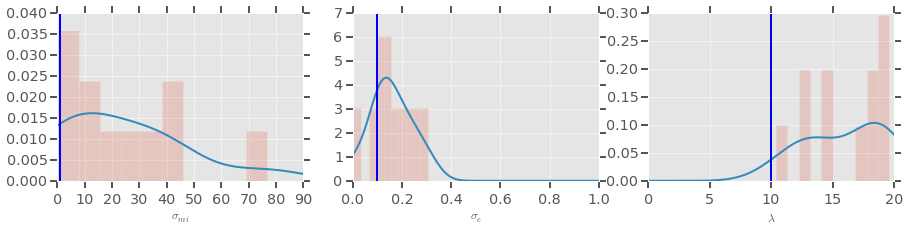

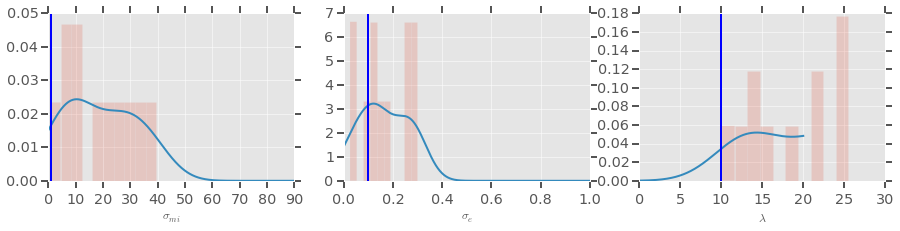

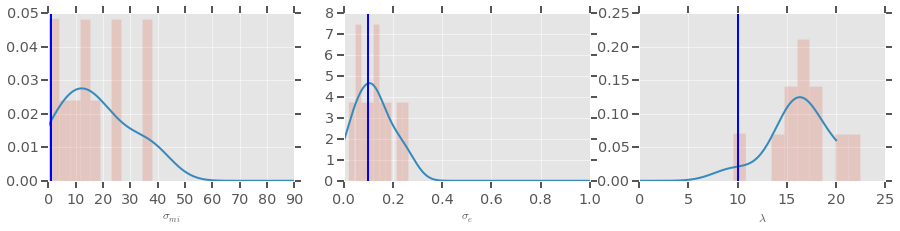

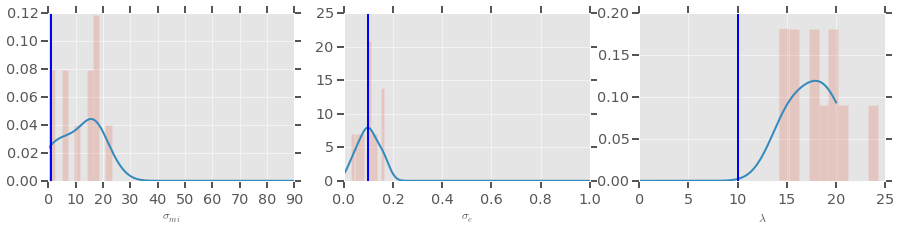

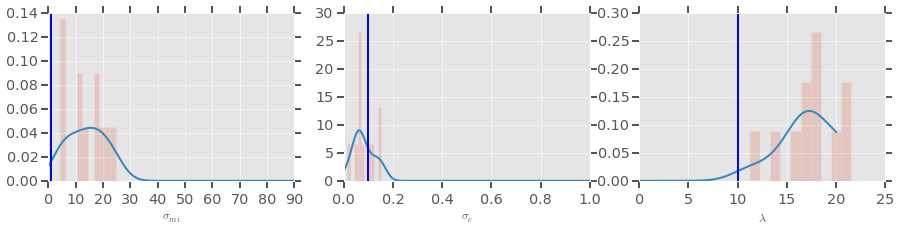

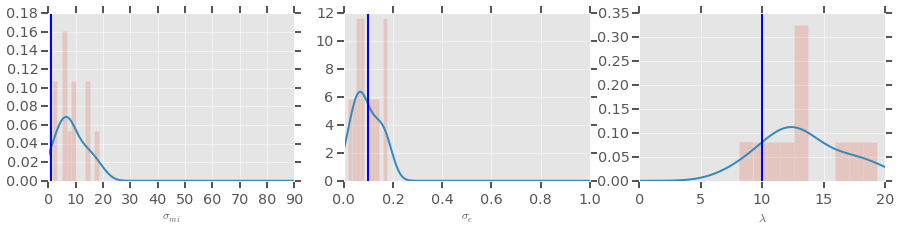

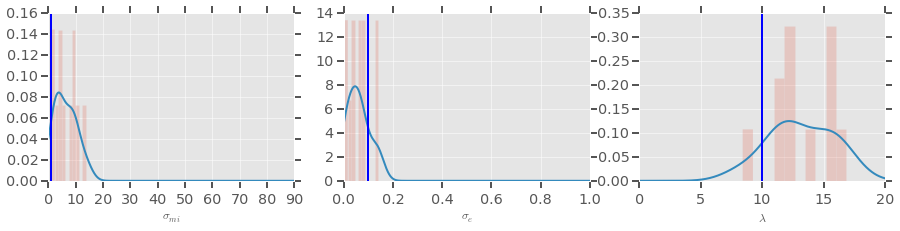

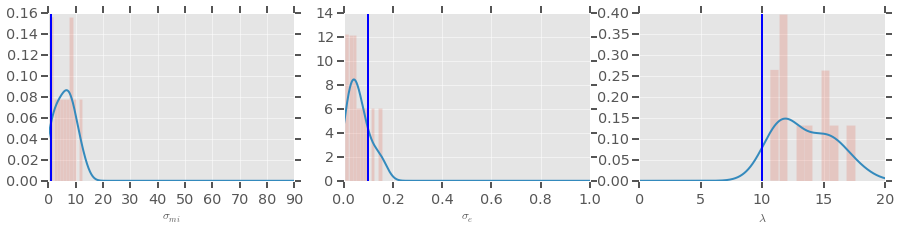

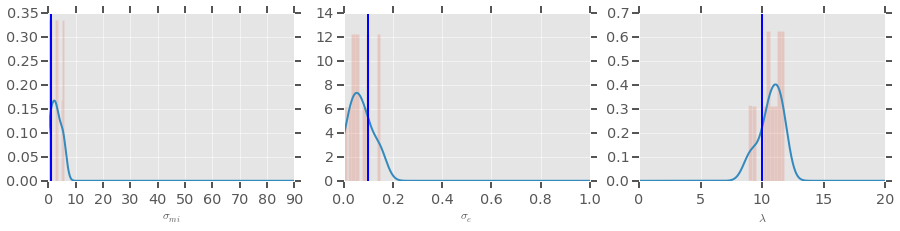

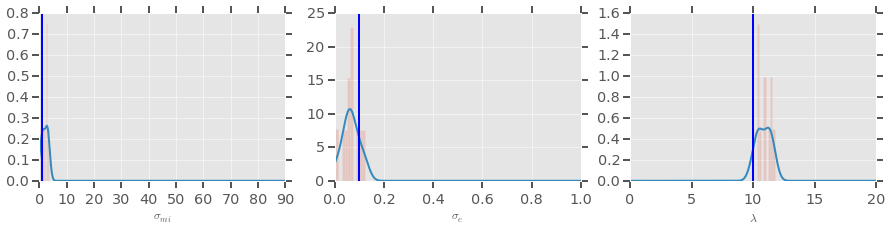

In [3]:
for P in OT:
    plt.figure(figsize=(15,3))
    plt.subplot(131)
    ker = stats.gaussian_kde([x[0] for x in P[0]])
    plt.hist([x[0] for x in P[0]],normed=True, alpha=0.2)
    x = np.linspace(0.0,90,1000)
    plt.plot(x,ker(x))
    plt.axvline(theta[0])
    plt.xlabel(r"$\sigma_{mi}$")
    plt.subplot(132)
    ker = stats.gaussian_kde([x[1] for x in P[0]])
    plt.hist([x[1] for x in P[0]],normed=True, alpha=0.2)
    x = np.linspace(0.0,1.0,1000)
    plt.plot(x,ker(x))
    plt.axvline(theta[1])
    plt.xlabel(r"$\sigma_{e}$")
    plt.subplot(133)
    ker = stats.gaussian_kde([x[2] for x in P[0]])
    plt.hist([x[2] for x in P[0]],normed=True, alpha=0.2)
    x = np.linspace(0,20,1000)
    plt.plot(x,ker(x))
    plt.axvline(theta[2])
    plt.xlabel(r"$\lambda$")

In [10]:
DT = pickle.load(file('demo.pkl'))

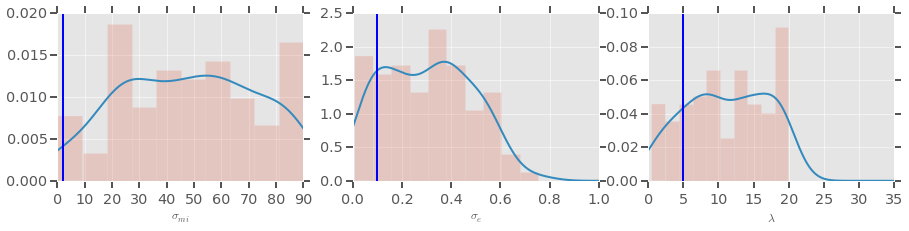

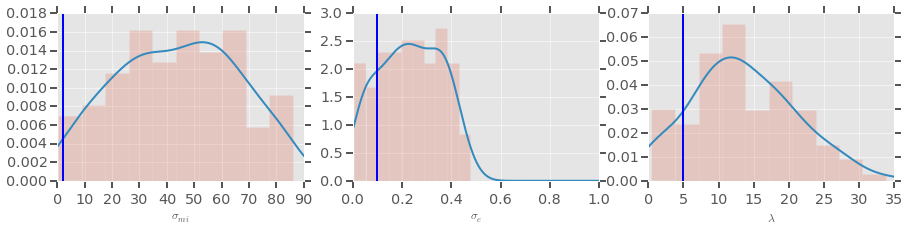

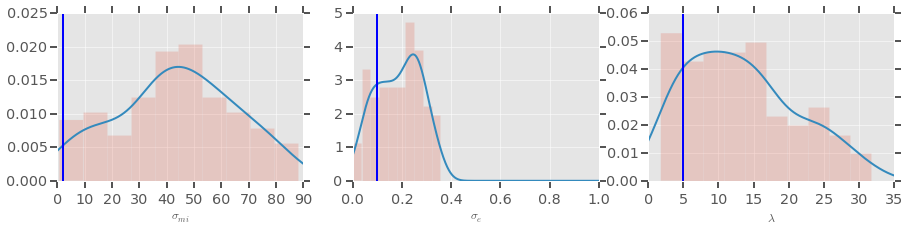

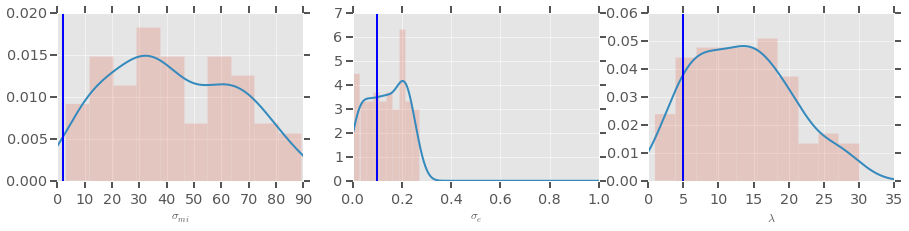

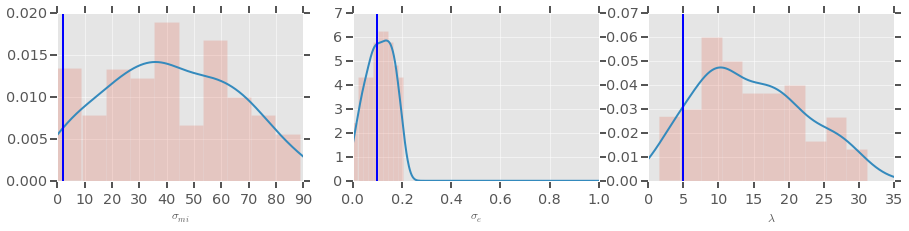

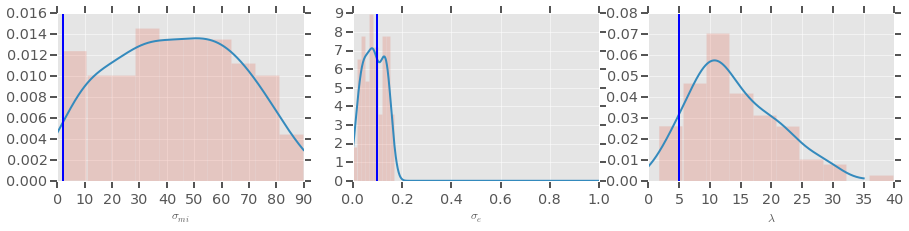

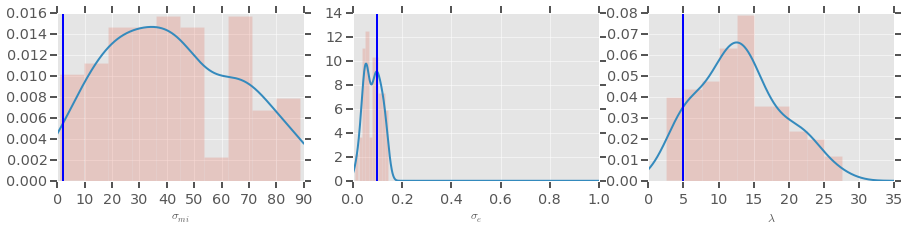

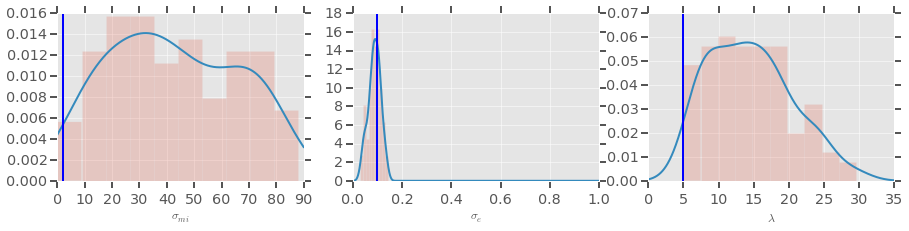

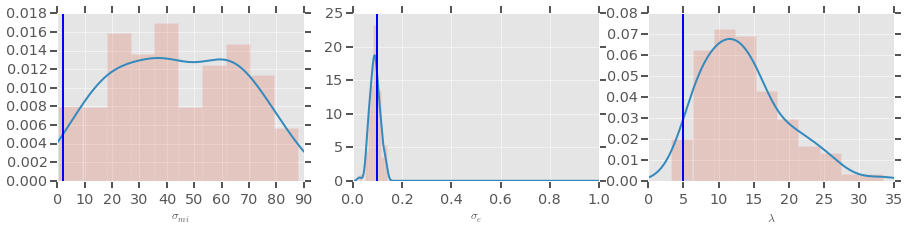

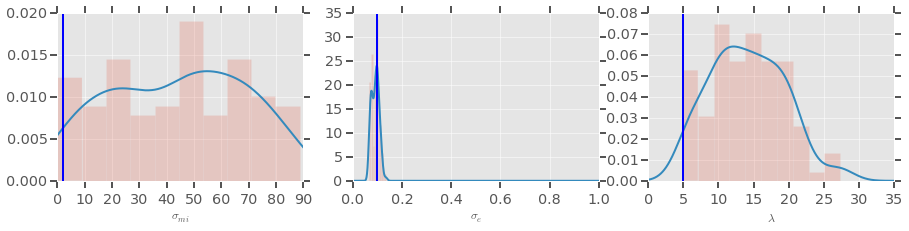

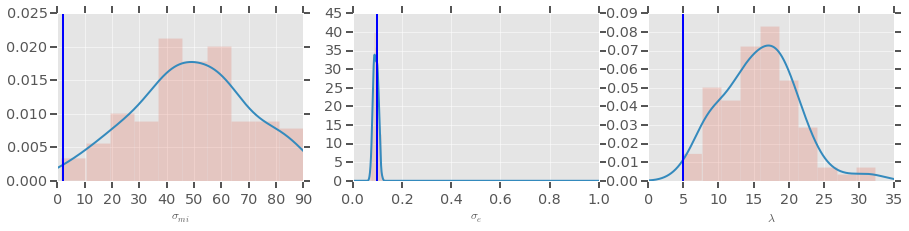

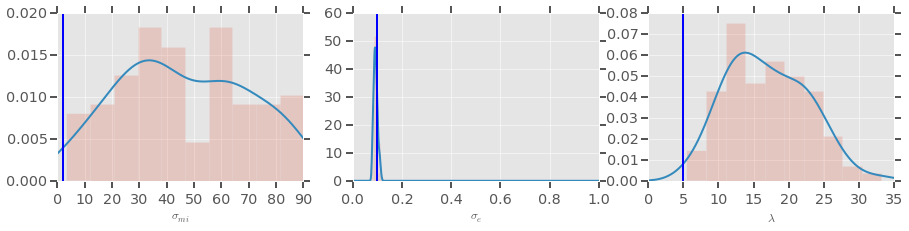

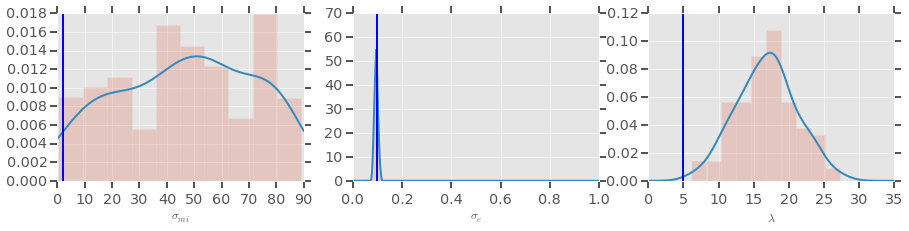

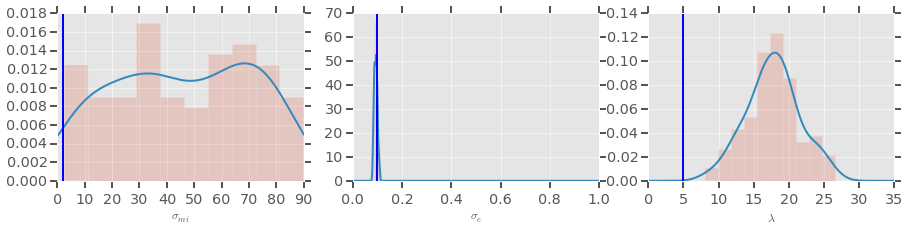

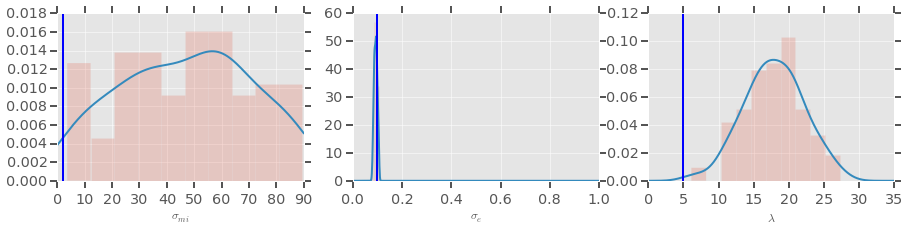

In [13]:
for P in DT:
    plt.figure(figsize=(15,3))
    plt.subplot(131)
    ker = stats.gaussian_kde([x[0] for x in P[0]])
    plt.hist([x[0] for x in P[0]],normed=True, alpha=0.2)
    x = np.linspace(0.0,90,1000)
    plt.plot(x,ker(x))
    plt.axvline(theta[0])
    plt.xlabel(r"$\sigma_{mi}$")
    plt.subplot(132)
    ker = stats.gaussian_kde([x[1] for x in P[0]])
    plt.hist([x[1] for x in P[0]],normed=True, alpha=0.2)
    x = np.linspace(0.0,1.0,1000)
    plt.plot(x,ker(x))
    plt.axvline(theta[1])
    plt.xlabel(r"$\sigma_{e}$")
    plt.subplot(133)
    ker = stats.gaussian_kde([x[2] for x in P[0]])
    plt.hist([x[2] for x in P[0]],normed=True, alpha=0.2)
    x = np.linspace(0,35,1000)
    plt.plot(x,ker(x))
    plt.axvline(theta[2])
    plt.xlabel(r"$\lambda$")

101